In [1]:
%load_ext wurlitzer
#from NIX_Testing import HDRL
from NIX_Testing import HDRL2
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
#HDRL.init()


In [2]:
HDRL2.globals(error_image=True, report=True)

GAIN : 5.700 (e-/ADU)
RN_ADU : 4.500 (ADU rms)
ERROR_METHOD : 0
ERROR_IMAGE : 1


In [3]:
def bpm_3d_test():
    n = 9
    ims = np.zeros([2048, 2048, n])
    bpm3d = np.zeros([2048, 2048, n])
    f_name = "/home/ydallilar/Documents/NIX/nixDetBackup/FUN-040/FUN-040-01-1-a/ERIS_NIX_CAL_DARKS225_%04d.fits"
    for i in range(n):
        ims[:,:,i] = fits.open(f_name % (24+i))[0].data
    bpm3d[:,:,:] = HDRL2.bpm_3d_compute(ims[:,:,:], method='relative', kappa_low=5., kappa_high=5.,offset=True)
    #del ims, bpm3d
    res = np.zeros([2048, 2048])
    res[np.where(np.sum(bpm3d, axis=2) > 0)] = 1
    plt.figure(figsize=(10,10))
    plt.imshow(res, origin='lower', cmap='gray')
    plt.show()

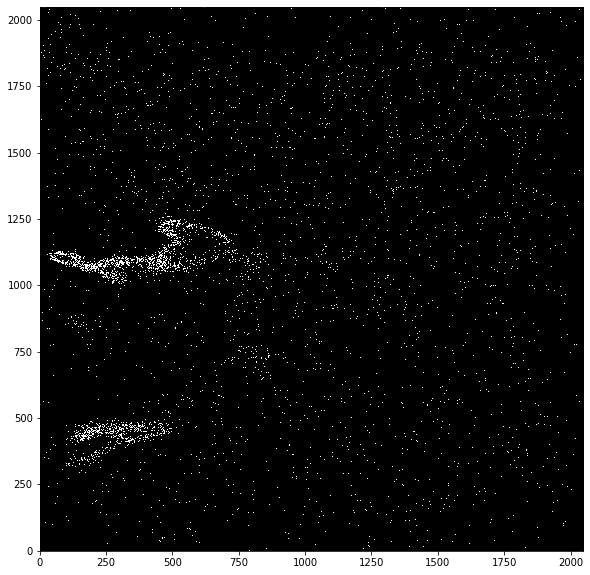

In [4]:
bpm_3d_test()


In [5]:
ims = np.zeros([2048, 2048, 8])
f_name = "/home/ydallilar/Documents/NIX/nixDetBackup/PER-124/PER-124-04-1/ERIS_NIX_TEC_LABGAINLINEARITY239_%04d.fits"


In [6]:
for i in range(8):  
    ims[:,:,i] = fits.open(f_name % (56+i*2))[0].data - fits.open(f_name % (16+i*2))[0].data


In [7]:
def bpm_2d_test():
    bpm2d = HDRL2.bpm_2d_compute(ims[:,:,0], method='filter', smooth_x=9, smooth_y=9)
    plt.figure(figsize=(10,10))
    plt.imshow(bpm2d, origin='lower', cmap='gray')

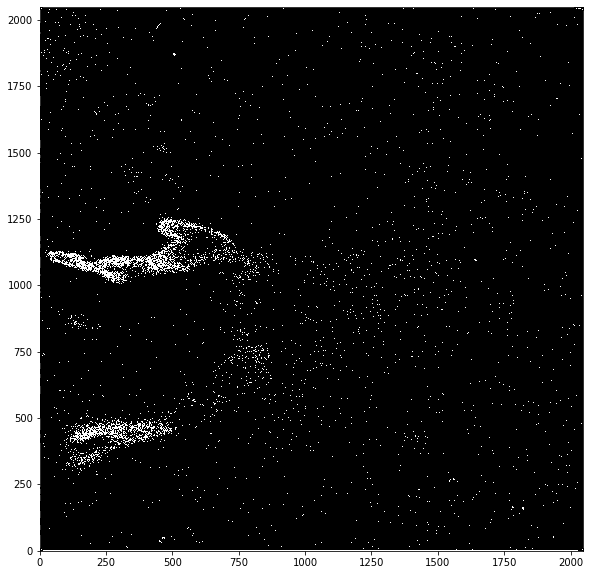

In [8]:
bpm_2d_test()

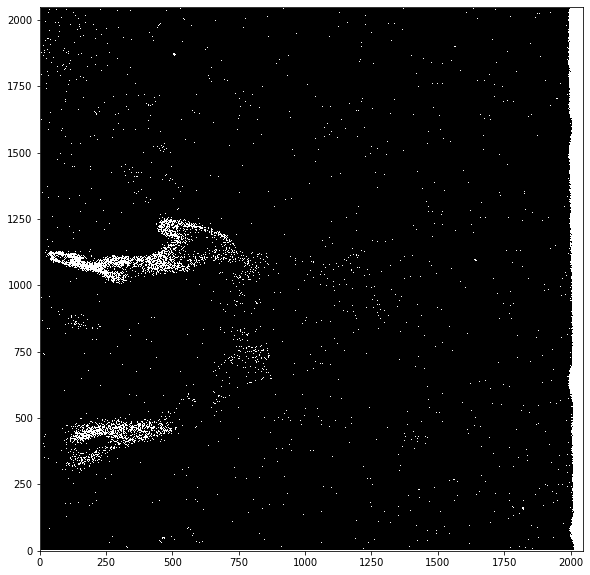

In [9]:
bpm2d = HDRL2.bpm_2d_compute(ims[:,:,3], method='legendre', kappa_low=5., kappa_high=10., maxiter=10,
                           steps_x=10, steps_y=10, filter_size_x=10, filter_size_y=10, order_x=2, order_y=2)
plt.figure(figsize=(10,10))
plt.imshow(bpm2d, origin='lower', cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


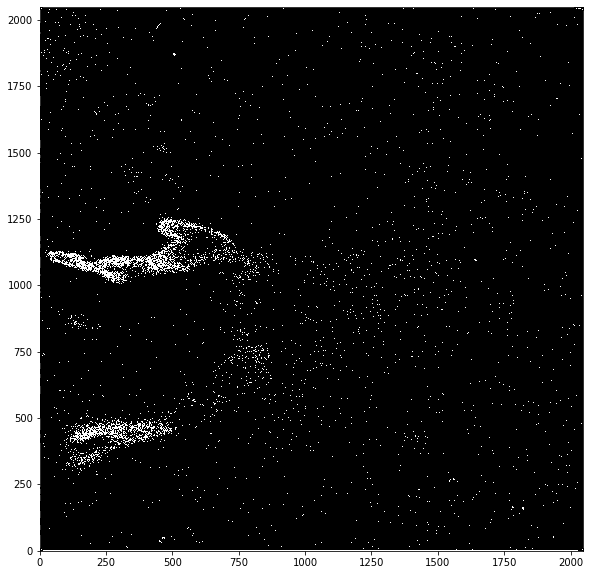

In [10]:
bpm2d = HDRL2.bpm_2d_compute(ims[:,:,0], method='filter', smooth_x=9, smooth_y=9)
print(bpm2d)
plt.figure(figsize=(10,10))
plt.imshow(bpm2d, origin='lower', cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


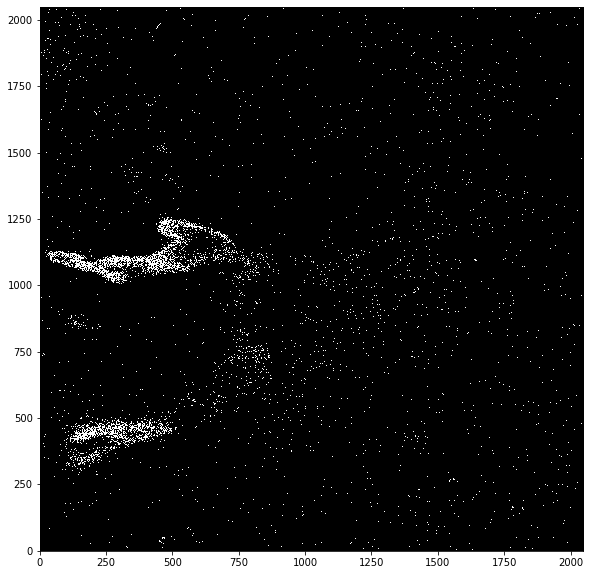

In [11]:
bpm2d = HDRL2.bpm_2d_compute(ims[:,:,0], method='filter', filter='median', border='filter')
print(bpm2d)
plt.figure(figsize=(10,10))
plt.imshow(bpm2d, origin='lower', cmap='gray')

In [12]:
expt = np.arange(8)*2+2

GAIN : 5.700 (e-/ADU)
RN_ADU : 4.500 (ADU rms)
ERROR_METHOD : 0
ERROR_IMAGE : 1


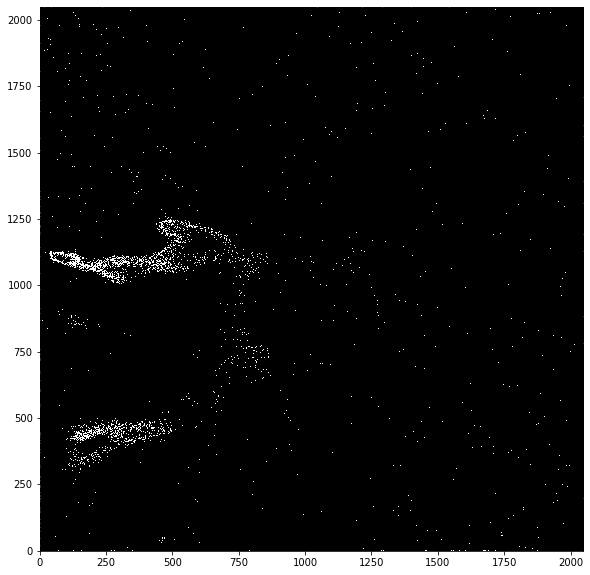

In [13]:
HDRL2.globals(report=True)
bpmfit = HDRL2.bpm_fit_compute(ims, expt, method="pval", degree=2, pval=10.)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')

In [14]:
chi2, dof, coef = HDRL2.fit_polynomial_imagelist(ims, expt, 2)
#coef = HDRL2.fit_polynomial_imagelist(ims, expt, 2)

1
2
3
4
5
6
2
3
4
5
6
2
3
4
5
6


%matplotlib notebook
plt.figure()
plt.imshow(chi2)
plt.figure()
plt.imshow(dof)
for i in range(3):
    plt.figure()
    plt.imshow(coef[:,:,i])
fits.PrimaryHDU(chi2).writeto("fitchi2.fits", overwrite=True)

[ 2  4  6  8 10 12 14 16]


(2048, 2048, 8)

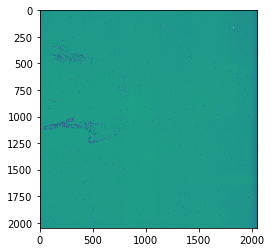

In [15]:
plt.imshow(ims[:,:,0])
print(expt)
ims.shape

GAIN : 5.700 (e-/ADU)
RN_ADU : 4.500 (ADU rms)
ERROR_METHOD : 0
ERROR_IMAGE : 1


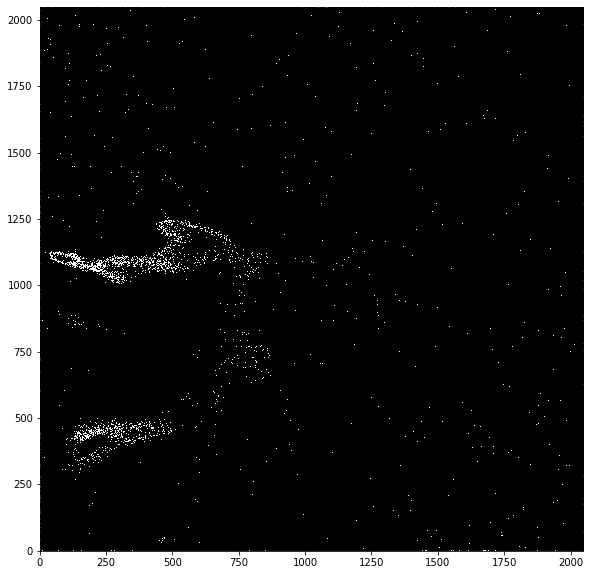

In [16]:
HDRL2.globals(report=True)
bpmfit = HDRL2.bpm_fit_compute(ims[:,:,:7], expt[:7], method="pval", degree=2, pval=10.)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')

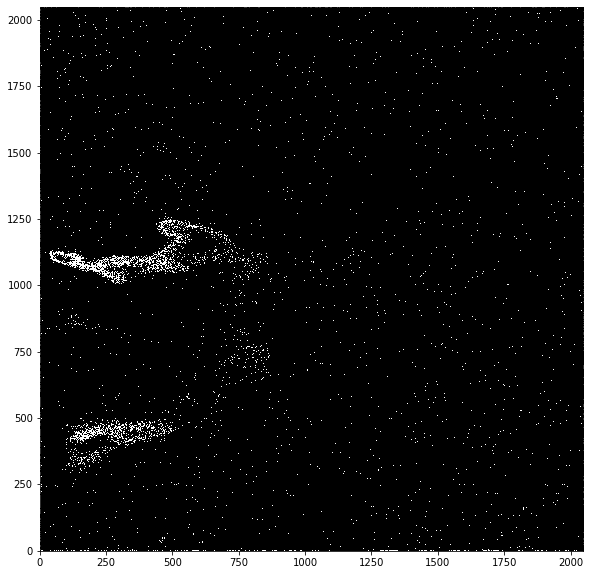

In [17]:
HDRL2.ERROR_IMAGE=1
bpmfit = HDRL2.bpm_fit_compute(ims, expt, method='rel_chi', degree=2, rel_chi_low=3., rel_chi_high=3.)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')

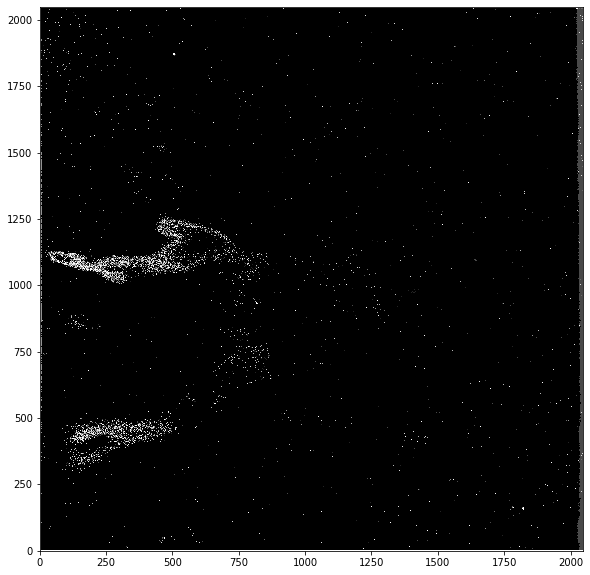

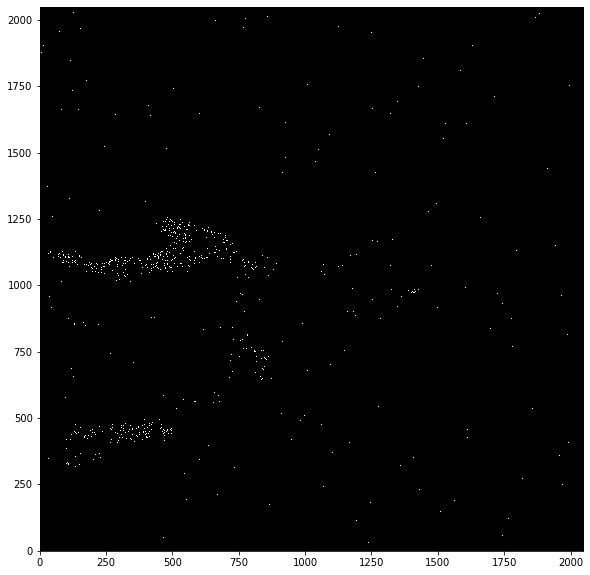

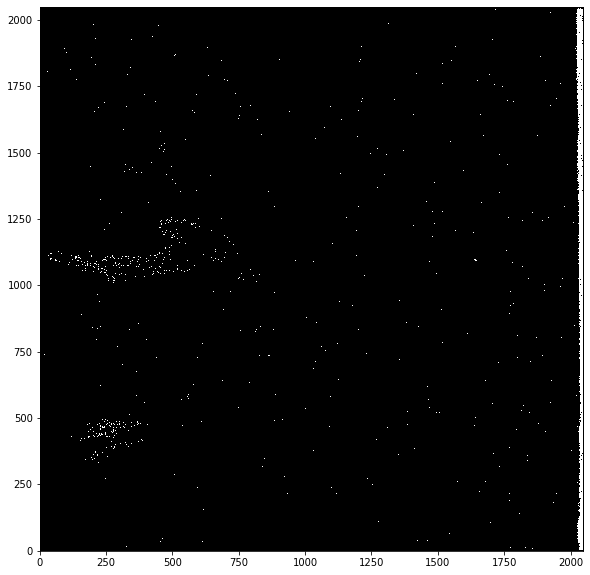

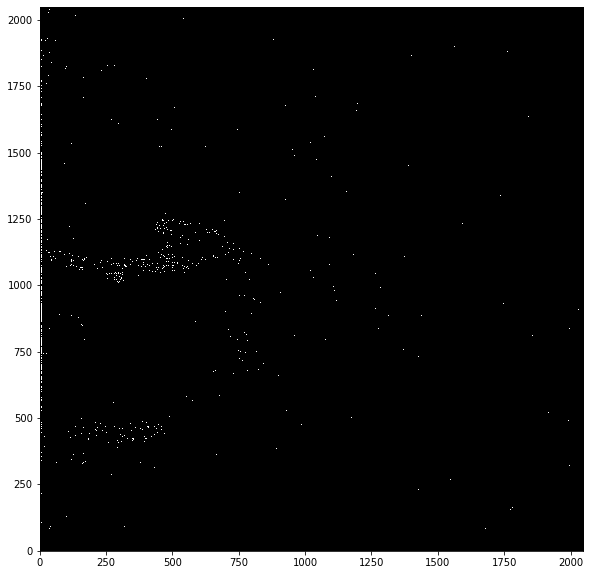

In [18]:
HDRL2.ERROR_IMAGE=1
bpmfit = HDRL2.bpm_fit_compute(ims, expt, method='rel_coef', degree=2, rel_coef_low=3., rel_coef_high=3.)
plt.figure(figsize=(10,10))
plt.imshow(bpmfit, cmap='gray', origin='lower')


for i in range(3):
    tmp = np.zeros([2048, 2048])
    tmp[np.where(bpmfit == 2**i)] = 1
    plt.figure(figsize=(10,10))
    plt.imshow(tmp, cmap='gray', origin='lower')
    